In [98]:
import pandas as pd
pd.set_option('display.max_rows',500)
import numpy as np
from datetime import datetime
import subprocess;import os

## Github Csv Data

In [81]:

git_pull = subprocess.Popen( ['git','pull'] ,
                         cwd = os.path.dirname( '../data/raw/COVID-19/' ),
                         shell = True,
                         stdout = subprocess.PIPE,
                         stderr = subprocess.PIPE )
(out, error) = git_pull.communicate()


print("Error : " + str(error))
print("out : " + str(out))



Error : b''
out : b'Already up to date.\n'


In [82]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
jh_raw=pd.read_csv(data_path)

In [83]:
time_idx=jh_raw.columns[4:]
print(time_idx)

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/4/20', '9/5/20', '9/6/20', '9/7/20', '9/8/20', '9/9/20', '9/10/20',
       '9/11/20', '9/12/20', '9/13/20'],
      dtype='object', length=236)


In [84]:
df_plot=pd.DataFrame({'date':time_idx})

In [85]:
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [86]:
jh_raw[jh_raw['Country/Region']=='Germany'].iloc[:,4::]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
130,0,0,0,0,0,1,4,4,4,5,...,250283,251058,251728,253626,254957,256433,258149,259735,260817,261737


In [87]:
country_list=['India','Italy','US','Germany']
for each in country_list:
    df_plot[each]=np.array(jh_raw[jh_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

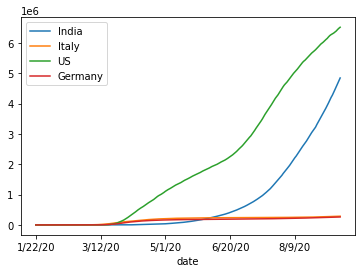

In [88]:
df_plot.set_index('date').plot()


In [89]:
datetime.strptime(df_plot.date[0],'%m/%d/%y') #converting into datetime format.

datetime.datetime(2020, 1, 22, 0, 0)

In [90]:
#converting into ISO datetime format.
time_idx=[datetime.strptime(each,'%m/%d/%y') for each in df_plot.date] 
time_str=[each.strftime("%Y-%m-%d") for each in time_idx] #ISO format.

In [91]:
time_str[:5]

['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25', '2020-01-26']

In [92]:
df_plot['date']=time_str

In [93]:
df_plot.head()

,date,India,Italy,US,Germany
0,2020-01-22,0,0,1,0
1,2020-01-23,0,0,1,0
2,2020-01-24,0,0,2,0
3,2020-01-25,0,0,2,0
4,2020-01-26,0,0,5,0


In [94]:
df_plot.to_csv(r'../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

## Relation Data model

In [49]:
jh_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [50]:
jh_data_bs=jh_raw.rename(columns={'Country/Region':'country','Province/State': 'state'}) # rename the country and state for comfort.


In [51]:
jh_data_bs=jh_data_bs.drop(columns=["Lat","Long"]) # dropping latitude and longitude columns
jh_data_bs.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,0,0,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,0,0,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


In [52]:
jh_test_data=jh_data_bs.set_index(['state','country']).T

In [53]:
jh_rel_data=jh_test_data.stack(level=(0,1)).reset_index().rename(columns={'level_0':'date',0:'confirmed'})

In [54]:
jh_rel_data.head()

,date,state,country,confirmed
0,1/22/20,NaN,Afghanistan,0.0
1,1/22/20,NaN,Albania,0.0
2,1/22/20,NaN,Algeria,0.0
3,1/22/20,NaN,Andorra,0.0
4,1/22/20,NaN,Angola,0.0


In [55]:
jh_rel_data['date']=jh_rel_data.date.astype('datetime64[ns]')

In [56]:

jh_rel_data.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

## Group by apply

In [78]:
jh_jb_data=pd.read_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',parse_dates=[0])
jh_jb_data=jh_jb_data.sort_values('date',ascending=True).reset_index(drop=True).copy()
jh_jb_data.head()

,date,state,country,confirmed
0,2020-01-22,NaN,Afghanistan,0.0
1,2020-01-22,Zhejiang,Cuba,0.0
2,2020-01-22,Zhejiang,Croatia,0.0
3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0
4,2020-01-22,Zhejiang,Costa Rica,0.0


In [79]:
test_data=jh_jb_data[((jh_jb_data['country']=='India')|(jh_jb_data['country']=='Germany'))&(jh_jb_data['date']>'2020-03-20')]

In [59]:
test_data

,date,state,country,confirmed
26701,2020-03-21,Zhejiang,Germany,22213.0
26859,2020-03-21,Zhejiang,India,330.0
26898,2020-03-21,NaN,India,330.0
26911,2020-03-21,NaN,Germany,22213.0
27153,2020-03-22,Zhejiang,Germany,24873.0
...,...,...,...,...
106012,2020-09-12,NaN,Germany,260817.0
106254,2020-09-13,Zhejiang,Germany,261737.0
106410,2020-09-13,Zhejiang,India,4846427.0
106449,2020-09-13,NaN,India,4846427.0


In [60]:
test_data.groupby(['country']).agg(np.max)

,date,confirmed
country,,
Germany,2020-09-13,261737.0
India,2020-09-13,4846427.0


In [61]:
# %load ../src/features/build_features.py
"""
Created on Mon Sep 14 01:14:41 2020

@author: Rahul Jakkamsetty
"""

import numpy as np
from sklearn import linear_model #importing a linear model from scikit library
reg = linear_model.LinearRegression(fit_intercept=True) # To make the linear fit to pass through the origin of the original data.
import pandas as pd

from scipy import signal # for savgol filter.


def get_doubling_time_via_regression(in_array):
    

    y = np.array(in_array)
    X = np.arange(-1,2).reshape(-1, 1)

    assert len(in_array)==3
    reg.fit(X,y)
    intercept=reg.intercept_
    slope=reg.coef_

    return intercept/slope


    must_contain=set(['state','country',filter_on])
    assert must_contain.issubset(set(df_input.columns)), ' Erro in calc_filtered_data not all columns in data frame'


    pd_DR_result= df_input.groupby(['state','country']).apply(rolling_reg,filter_on).reset_index()

    pd_DR_result=pd_DR_result.rename(columns={filter_on:filter_on+'_DR',
                             'level_2':'index'})

    # updated after making several modifications in the code.
    df_output=pd.merge(df_input,pd_DR_result[['index',str(filter_on+'_DR')]],left_index=True,right_on=['index'],how='left')
    df_output=df_output.drop(columns=['index'])


    return df_output




In [62]:
test_data

,date,state,country,confirmed
26701,2020-03-21,Zhejiang,Germany,22213.0
26859,2020-03-21,Zhejiang,India,330.0
26898,2020-03-21,NaN,India,330.0
26911,2020-03-21,NaN,Germany,22213.0
27153,2020-03-22,Zhejiang,Germany,24873.0
...,...,...,...,...
106012,2020-09-12,NaN,Germany,260817.0
106254,2020-09-13,Zhejiang,Germany,261737.0
106410,2020-09-13,Zhejiang,India,4846427.0
106449,2020-09-13,NaN,India,4846427.0


In [63]:
def rolling_reg(df_input,col='confirmed'):
    days_back=3
    res=df_input[col].rolling(window=days_back,min_periods=days_back).apply(get_doubling_time_via_regression,raw=False)
    return res

In [64]:
test_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed')

state     country        
Zhejiang  Germany  26701             NaN
                   27153             NaN
                   27606        7.417994
                   28059        7.142035
                   28509        8.012983
                   28961        6.954407
                   29415        6.501919
                   29865        7.390371
                   30317       10.136671
                   30770       13.541893
                   31223       13.781393
                   31673       13.140681
                   32125       12.037271
                   32578       12.735506
                   33029       16.052694
                   33481       21.372453
                   33934       27.427355
                   34387       27.511936
                   34837       21.792179
                   35289       21.495848
                   35742       26.565108
                   36194       36.198404
                   36645       43.982990
                   37099       

In [65]:




from scipy import signal # for savgol filter.



def savgol_filter(df_input,column='confirmed',window=5):


    df_result=df_input

    filter_in=df_input[column].fillna(0) # attention with the neutral element here

    result=signal.savgol_filter(np.array(filter_in),
                           window, # window size used for filtering
                           1)
    df_result[str(column+'_filtered')]=result
    return df_result # has both input and output.



In [66]:
jh_filtered=jh_jb_data[['state','country','confirmed']].groupby(['state','country']).apply(savgol_filter).reset_index()

In [72]:
result_large=jh_jb_data[['state','country','confirmed']].groupby(['state','country']).apply(rolling_reg,'confirmed').reset_index() # applying rolling reg on large data.

In [74]:
result_large=result_large.rename(columns={'confirmed':'doubling_rate','level_2':'index'})
result_large.head()

,state,country,index,doubling_rate
0,Alberta,Canada,351,NaN
1,Alberta,Canada,801,NaN
2,Alberta,Canada,1252,NaN
3,Alberta,Canada,1704,NaN
4,Alberta,Canada,2157,NaN


In [76]:
jh_jb_data=jh_jb_data.reset_index()

In [77]:
pd.merge(jh_jb_data,result_large,on=['index'],how='left')

,index,date,state_x,country_x,confirmed,state_y,country_y,doubling_rate
0,0,2020-01-22,NaN,Afghanistan,0.0,NaN,NaN,NaN
1,1,2020-01-22,Zhejiang,Cuba,0.0,Zhejiang,Cuba,NaN
2,2,2020-01-22,Zhejiang,Croatia,0.0,Zhejiang,Croatia,NaN
3,3,2020-01-22,Zhejiang,Cote d'Ivoire,0.0,Zhejiang,Cote d'Ivoire,NaN
4,4,2020-01-22,Zhejiang,Costa Rica,0.0,Zhejiang,Costa Rica,NaN
...,...,...,...,...,...,...,...,...
106667,106667,2020-09-13,NaN,San Marino,722.0,NaN,NaN,NaN
106668,106668,2020-09-13,NaN,Saint Vincent and the Grenadines,64.0,NaN,NaN,NaN
106669,106669,2020-09-13,NaN,Saint Lucia,27.0,NaN,NaN,NaN
106670,106670,2020-09-13,NaN,Timor-Leste,27.0,NaN,NaN,NaN


## Full Flat table for SIR

In [108]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
jh_raw=pd.read_csv(data_path)

In [109]:
country_list=jh_raw['Country/Region']
time_idx=jh_raw.columns[4:]
df_plot_full=pd.DataFrame({'date':time_idx})

In [110]:
for each in country_list:
    df_plot_full[each]=np.array(jh_raw[jh_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))


In [112]:
time_idx_full=[datetime.strptime(each,'%m/%d/%y') for each in df_plot_full.date] 
time_str_full=[each.strftime("%Y-%m-%d") for each in time_idx_full] #ISO format.
df_plot_full['date']=time_str_full

In [113]:
df_plot_full.head()

,date,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
0,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
3,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
4,2020-01-26,0,0,0,0,0,0,0,0,4,...,0,0,0,0,2,0,0,0,0,0


In [114]:
df_plot_full.to_csv(r'../data/processed/COVID_total_flat_table.csv',sep=';',index=False)